# Code

In [3]:
from timeit import default_timer as timer
import math
import json
import inspect
import concurrent.futures as cf  # doesn't work with sklearn
import pandas as pd
import numpy as np
import copy as copy
import statistics as stt
import seaborn as sns
sns.set_theme()
from os import system, getcwd, startfile
from os.path import join
from time import time
from scipy.io import arff
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
%matplotlib inline

In [4]:
class ml_svm():
    def __init__(self, class_num=[3, 4], N=1000, SD=1, DIFF=7, show=False, plot=False, random_center=False):
        # in later version, class_num, N, SD, DIFF should not be included in __init__
        # store variables
        self.class_num = class_num
        self.N = N
        self.SD = SD
        self.DIFF = DIFF
        # generate data set
        np.random.seed(2019)
        self.center = []
        self.X = []
        self.y = []
        for i in self.class_num:
            # generate data by class number array length
            center = []
            X = []
            y = []
            if random_center:
                x_center = np.random.randn(i) * self.DIFF / 2
                y_center = np.random.randn(i) * self.DIFF / 2
            else:
                # data center is circled around the origin and distance is DIFF
                angle = np.arange(0, i, 1, dtype=float) * 360 / i
                x_center = np.around(
                    self.DIFF * np.cos(angle * math.pi / 180), decimals=2)
                y_center = np.around(
                    self.DIFF * np.sin(angle * math.pi / 180), decimals=2)
            for j in range(i):
                # generate data by class number array element value
                center.append([x_center[j], y_center[j]])
                x = np.random.randn(self.N, 2) * self.SD + center[-1]
                X.append(x)
                y.append(np.full(self.N, j))
            X = np.concatenate(X)
            y = np.concatenate(y)
            self.X.append(X)
            self.y.append(y)
            self.center.append(center)
        if show:
            print('center=', self.center)
            # print('X=', self.X)
            # print('y=', self.y)
        if plot:
            for i in range(len(self.class_num)):
                plt.scatter(self.X[i][:, 0], self.X[i][:, 1], c=self.y[i])
                plt.hlines(0, -self.DIFF * 1.5, self.DIFF * 1.5, linestyles='dashed')
                plt.vlines(0, -self.DIFF * 1.5, self.DIFF * 1.5, linestyles='dashed')
                plt.title('data of class_num=' + str(self.class_num[i]))
                plt.show()

    def run_svc(self, show=False, plot=False, C=1.0, gamma=0.01, decision_function_shape='ovr'):
        # run SVC
        result = {'acc': [], 'pre': [], 'rec': [], 'f1': []}
        for i in range(len(self.class_num)):
            svc = SVC(kernel='linear', C=C, gamma=gamma, decision_function_shape=decision_function_shape)
            svc.fit(self.X[i], self.y[i])
            y_pred = svc.predict(self.X[i])
            result['acc'].append(accuracy_score(self.y[i], y_pred))
            result['pre'].append(precision_score(
                self.y[i], y_pred, average='macro'))
            result['rec'].append(recall_score(self.y[i], y_pred, average='macro'))
            result['f1'].append(f1_score(self.y[i], y_pred, average='macro'))
            if show:
                print('class_num=', self.class_num[i])
                print('accuracy=', result['acc'][-1])
                print('precision=', result['pre'][-1])
                print('recall=', result['rec'][-1])
                print('f1=', result['f1'][-1])
            if plot:
                color = {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow'}
                xcolor = [color[i] for i in self.y[i]]
                plt.scatter(self.X[i][:, 0], self.X[i][:, 1], c=xcolor)
                plt.hlines(0, -self.DIFF * 1.5, self.DIFF * 1.5, linestyles='dashed')
                plt.vlines(0, -self.DIFF * 1.5, self.DIFF * 1.5, linestyles='dashed')
                for j in range(self.class_num[i]):
                    GX = np.random.uniform(-self.DIFF *
                                           1.5, self.DIFF * 1.5, self.N)
                    GY = -1.0 * (svc.intercept_[j] + svc.coef_[j][0] * GX) / svc.coef_[j][1]
                    plt.plot(GX, GY, c=color[j])
                # plt.title('svm of class_num=' + str(self.class_num[i]))
                plt.title(
                    'svm of class_num={0}, decision_function_shape={1}'.format(str(self.class_num[i]), decision_function_shape))
                # plt.title('svm ({0}) result of class_num={1}'.format(
                #     inspect.signature(self.run_svc), str(self.class_num[i])))
                # signature
                # getfullargspec
                plt.xlim(-self.DIFF * 1.5, self.DIFF * 1.5)
                plt.ylim(-self.DIFF * 1.5, self.DIFF * 1.5)
                plt.show()





In [5]:
class ml_svm2():
    def __init__(self):
        pass

    def generate_data_center(self, class_num=[3, 4], DIFF=7, show=False, plot=False, random_center=False):
        # in later version, class_num, N, SD, DIFF should not be included in __init__
        # store variables
        self.class_num = class_num
        self.DIFF = DIFF
        # generate data set
        np.random.seed(2019)
        self.center = []
        for i in self.class_num:
            # generate data by class number array length
            center = []
            if random_center:
                x_center = np.random.randn(i) * self.DIFF / 2
                y_center = np.random.randn(i) * self.DIFF / 2
            else:
                # data center is circled around the origin and distance is DIFF
                angle = np.arange(0, i, 1, dtype=float) * 360 / i
                x_center = np.around(
                    self.DIFF * np.cos(angle * math.pi / 180), decimals=2)
                y_center = np.around(
                    self.DIFF * np.sin(angle * math.pi / 180), decimals=2)
            for j in range(i):
                center.append([x_center[j], y_center[j]])
            self.center.append(center)
        if show:
            print('centers=')
            for i in self.center:
                print(i)
        if plot:
            print('centers=')
            for i in self.center:
                x = []
                y = []
                for j in i:
                    # for k in j:
                    x.append(j[0])
                    y.append(j[1])
                plt.scatter(x=x, y=y, label='class_num=' + str(len(i)), alpha=0.5)
            plt.legend()
            plt.title('data center')
            plt.show()
            
    def generate_data(self, show=False, plot=False, type=0, N=1000, SD=1):
        self.N = N
        self.SD = SD
        
        def generate_x():
            def generate_x_subset(input_set):
                # print(len(input_set))
                X_X = []
                for j in range(len(input_set)):
                    x = np.random.randn(self.N, 2) * \
                        self.SD + input_set[j]
                    X_X.append(x)
                X_X = np.concatenate(X_X)
                return X_X

            for i in range(len(self.class_num)):
                X = []
                if type == 0:
                    runs = self.class_num[i]
                    X = generate_x_subset(self.center[i])
                    self.X = X
                elif type == 1:
                    index = []
                    center_group = []
                    runs = len(self.center[i])

                    for j in range(runs):
                        for k in range(runs):
                            temp = [k, j]
                            if temp in index:
                                continue
                            temp = [j, k]
                            if temp in index:
                                continue
                            if j == k:
                                continue
                            else:
                                index.append(temp)

                    for element in index:
                        temp = [self.center[i][element[0]],
                            self.center[i][element[1]]]
                        center_group.append(temp)
                    
                    for element in index:
                        X.append(generate_x_subset(element))
                    self.X.append(X)
                
            print(len(self.X))
            # print(self.X)

                
        def generate_y():
            def generate_y_subset():
                y_y = []
                for j in range(runs):
                    y_y.append(np.full(self.N, y_group_value[j]))
                y_y = np.concatenate(y_y)
                return y_y

            for i in range(len(self.class_num)):
                y = []
                if type == 0:
                    # y value based on group
                    runs = self.class_num[i]
                    y_group_value = range(self.class_num[i])
                    y = generate_y_subset()
                    self.y.append(y)
                elif type == 1:
                    # ovo y value
                    runs = int(self.class_num[i] * (self.class_num[i] - 1) / 2)
                    y_group_value = []
                    for j in range(runs):
                        y_group_value.append([0, 1])
                    print(y_group_value)

                elif type == 2:
                    # ovr y value
                    runs = self.class_num[i]
                    y_group_value = []
                    for j in range(runs):
                        y_group_value.append(0)
                        y_group_value.append(1)
                
                
                

        self.X = []
        self.y = []
        generate_x()
        generate_y()

        if show:
            print('X=', self.X)
            print('y=', self.y)
        if plot:
            for i in range(len(self.class_num)):
                if type == 0:
                    plt.scatter(self.X[i][:, 0], self.X[i][:, 1], c=self.y[i])
                if type == 1:
                    for j in range(len(self.X[i])):
                        plt.scatter(self.X[i][j][:, 0], self.X[i][j][:, 1], c=self.y[i][j])
                plt.hlines(0, -self.DIFF * 1.5, self.DIFF *
                        1.5, linestyles='dashed')
                plt.vlines(0, -self.DIFF * 1.5, self.DIFF *
                        1.5, linestyles='dashed')
                plt.title('data of class_num=' + str(self.class_num[i]))
                plt.show()
            
    

    def mb_ovo(self):
        for i in range(len(self.class_num)):
            # generate subset
            for j in range(self.class_num[i]):
                xo = self.X[j]
                xr = self.X[:j] + self.X[j+1:]
                yo = self.y[j]
                yr = self.y[:j] + self.y[j+1:]

    def mb_ovr(self):
        pass
        for i in range(len(self.class_num)):
            # generate subset
            for j in range(self.class_num[i]):
                xo = self.X[j]
                xr = self.X[:j] + self.X[j+1:]

                y0 = np.zeros(self.N)
                yr = np.ones(self.N * (self.class_num[i] - 1))

            # # run svc on subset
            svc = SVC(kernel='linear')
            svc.fit(self.X[i], self.y[i])
            y_pred = svc.predict(self.X[i])

            # # print result
            # print('class_num=', self.class_num[i])
            # print('accuracy=', accuracy_score(self.y[i], y_pred))
            # print('precision=', precision_score(
            #     self.y[i], y_pred, average='macro'))
            # print('recall=', recall_score(self.y[i], y_pred, average='macro'))
            # print('f1=', f1_score(self.y[i], y_pred, average='macro'))

            # # plot result


In [133]:
class ml_svm3():
    def __init__(self):
        pass

    def generate_data_center(self, class_num=3, DIFF=7, random_center=False, centerselection=[0, 0], show=False, plot=False):
        self.class_num = class_num
        self.DIFF = DIFF
        self.random_center = random_center
        self.center = []
        if self.random_center:
            x_center = np.random.randn(self.class_num) * self.DIFF / 2
            y_center = np.random.randn(self.class_num) * self.DIFF / 2
        else:
            # data center is circled around the origin and distance is DIFF
            angle = np.arange(0, self.class_num, 1, dtype=float) * 360 / self.class_num
            x_center = np.around(
                self.DIFF * np.cos(angle * math.pi / 180), decimals=2)
            y_center = np.around(
                self.DIFF * np.sin(angle * math.pi / 180), decimals=2)
        self.center = np.array([x_center, y_center]).T
        temp = []
        for element in centerselection:
            temp.append(self.center[element])
        self.center = temp
        # print(self.center.shape)
        # print(self.center)
        if show:
            for i in self.center:
                print(i)
        if plot:
            for i in self.center:
                plt.scatter(i[0], i[1])
            plt.hlines(0, -self.DIFF * 1.5, self.DIFF *
                       1.5, linestyles='dashed')
            plt.vlines(0, -self.DIFF * 1.5, self.DIFF *
                       1.5, linestyles='dashed')
            plt.title('center of data')
            plt.show()

    def generate_data(self, N=1000, SD=1, DIFF=7, show=False, plot=False):
        X = []
        y = []
        self.class_num = len(self.center)
        for i in range(self.class_num):
            # X
            X.append([np.random.randn(N, 2) * SD + self.center[i]])
            # y
            y.append([(np.ones(N) * i).astype(int)])
        X = np.concatenate(X)
        y = np.concatenate(y)

        if show:
            print(np.shape(X))
            print(np.shape(y))
            # print('X=', X)
            # print('y=', y)
        if plot:
            for i in range(self.class_num):
                tempx = []
                tempy = []
                for j in range(len(X[i])):
                    tempx.append(X[i][j][0])
                    tempy.append(X[i][j][1])
                plt.scatter(tempx, tempy, label='group ' + str(y[i][j]), alpha=0.5)
            plt.hlines(0, -DIFF * 1.5, DIFF *
                        1.5, linestyles='dashed')
            plt.vlines(0, -DIFF * 1.5, DIFF *
                        1.5, linestyles='dashed')
            plt.title('data of class_num=' + str(self.class_num))
            plt.legend()
            plt.show()

        # X reduce dimension
        tempX = []
        for i in range(self.class_num):
            for j in range(len(X[i])):
                tempX.append(X[i][j])
        X = np.array(tempX)
        
        # y reduce dimension
        tempy = []
        for i in range(self.class_num):
            for j in range(len(y[i])):
                tempy.append(y[i][j])
        y = np.array(tempy)
        self.N = N
        return X, y

    def run(self, X, y, show=False, plot=False):
        result = {'acc': [], 'pre': [], 'rec': [], 'f1': []}
        svc = SVC(kernel='linear')
        svc.fit(X, y)
        y_pred = svc.predict(X)
        result['acc'].append(accuracy_score(y, y_pred))
        result['pre'].append(precision_score(y, y_pred, average='macro'))
        result['rec'].append(recall_score(y, y_pred, average='macro'))
        result['f1'].append(f1_score(y, y_pred, average='macro'))
        if show:
            print('accuracy=', result['acc'])
            print('precision=', result['pre'])
            print('recall=', result['rec'])
            print('f1=', result['f1'])
        if plot:
            plt.scatter(X[:, 0], X[:, 1], c=y_pred, alpha=0.5)
            plt.hlines(0, -self.DIFF * 1.5, self.DIFF *
                        1.5, linestyles='dashed')
            plt.vlines(0, -self.DIFF * 1.5, self.DIFF *
                        1.5, linestyles='dashed')
            for x in range(self.class_num):
                try:
                    GX = np.random.uniform(-self.DIFF, self.DIFF, 100)
                    GY = -GX * svc.coef_[x][0] / svc.coef_[x][1] - svc.intercept_[x] / svc.coef_[x][1]
                    plt.plot(GX, GY, label='group ' + str(x))
                except:
                    pass
            plt.xlim(-self.DIFF * 1.5, self.DIFF * 1.5)
            plt.ylim(-self.DIFF * 1.5, self.DIFF * 1.5)
            # plt.title('data of class_num=' + str(self.class_num))
            plt.legend()
            plt.show()


# Question

1. Create data for 3 or 4 classes. 
2. Use SVM to find the results. 
3. Manually doing binary classification with ovo or ovr (if you have enough time, do both). Save the results for each binary classification so that you can do the prediction based on the voting over these numerous binary classifications in ovr and ovo. 
4. compare the results from steps 2 and 3. 

## Q1

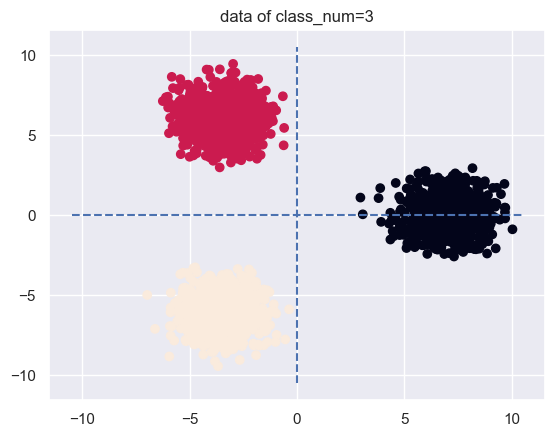

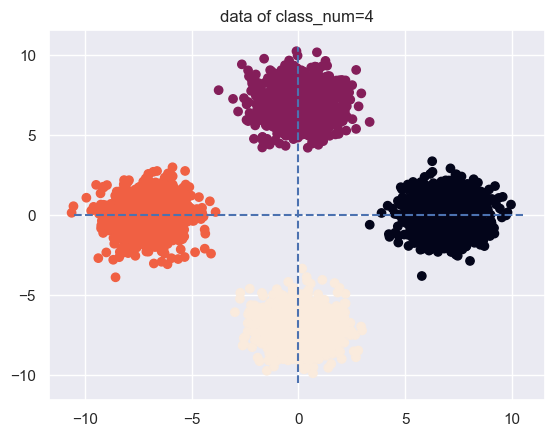

In [7]:
q1 = ml_svm(plot=True)

## Q2

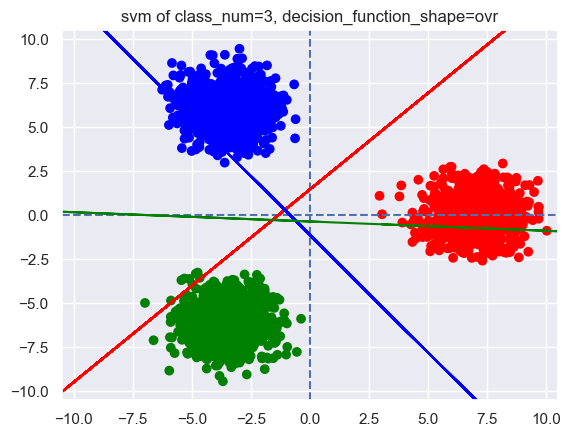

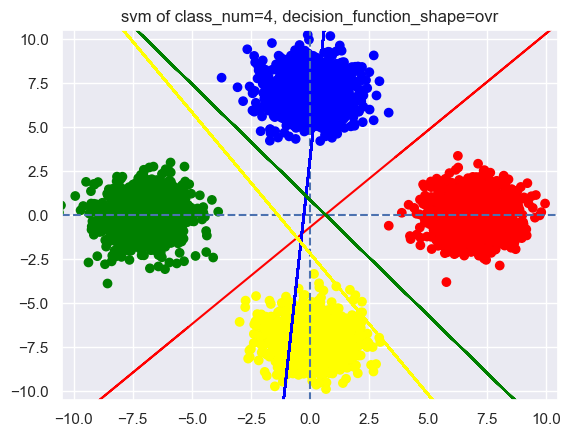

In [8]:
q2 = ml_svm()
q2.run_svc(plot=True)


## Q3

### SVM-Buildin Multi-class Classifier

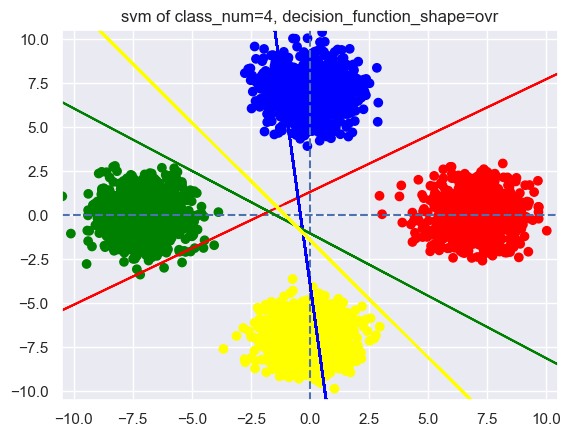

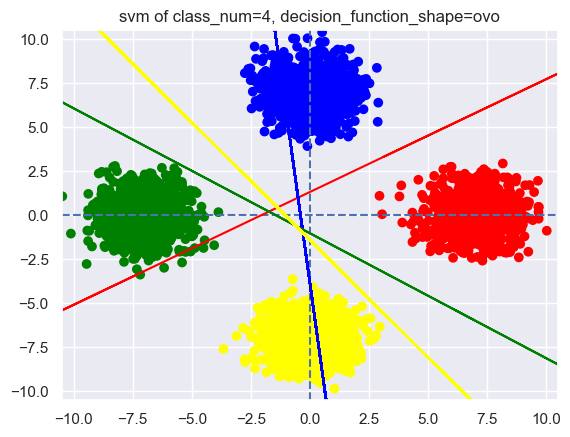

In [9]:
q2 = ml_svm(class_num=[4])
q2.run_svc(plot=True, decision_function_shape='ovr')
q2.run_svc(plot=True, decision_function_shape='ovo')


class_num= 4
accuracy= 0.77875
precision= 0.7771710904131655
recall= 0.77875
f1= 0.7778197117104431


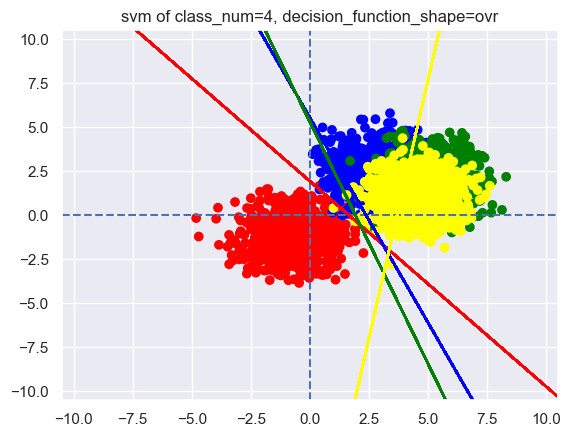

class_num= 4
accuracy= 0.77875
precision= 0.7771710904131655
recall= 0.77875
f1= 0.7778197117104431


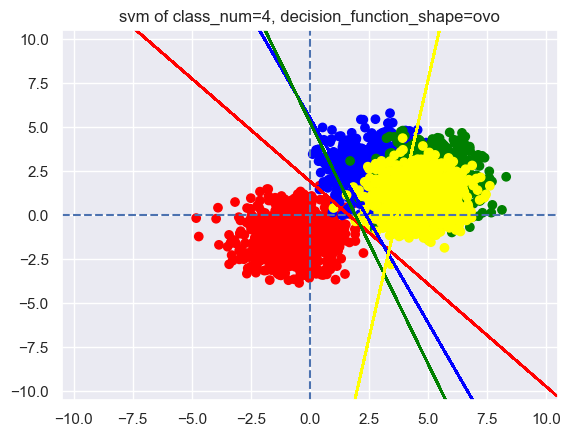

In [10]:
# random center
q2 = ml_svm(class_num=[4], DIFF=7, random_center=True)
q2.run_svc(show=True, plot=True, decision_function_shape='ovr')
q2.run_svc(show=True, plot=True, decision_function_shape='ovo')


### Manual binary 'ovo' SVM

If there are A, B, C, D four sets of data.<br>
Workflow: A&B, A&C, A&D, B&C, B&D, C&D. (compare all sets against each others)<br>
Total count: 4*(4-1)/2 = 6, matches.

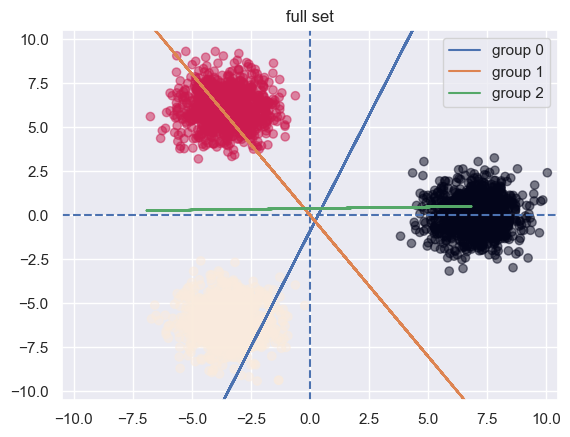

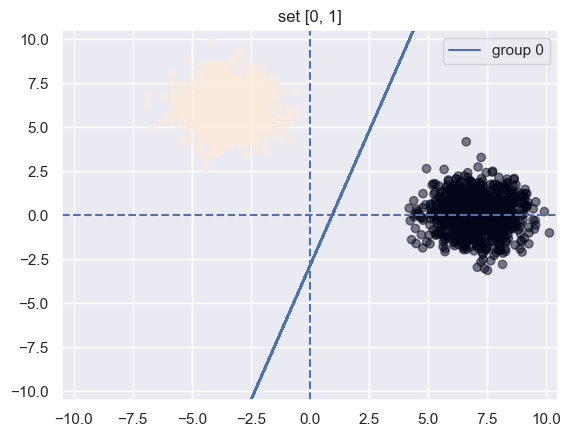

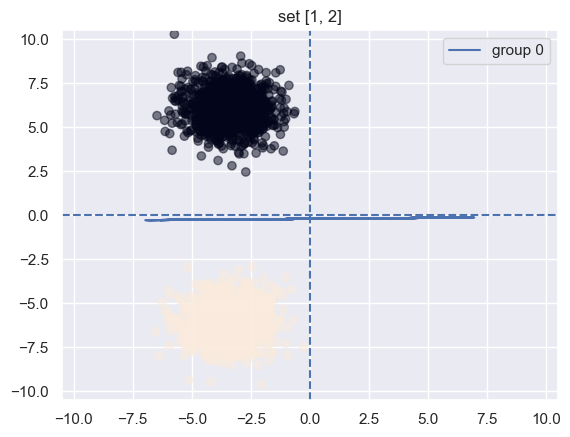

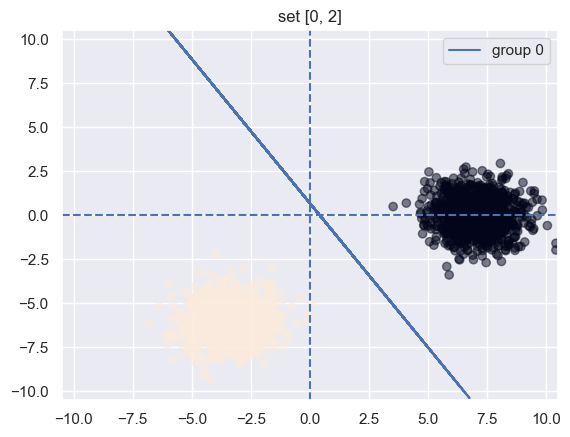

In [141]:
q3mb0vr = ml_svm3()
# all subsets
q3mb0vr.generate_data_center(
    plot=False, show=False, random_center=False, centerselection=[0, 1, 2], class_num=3)
X, y = q3mb0vr.generate_data(plot=False, show=False, N=1000)
plt.title('full set')
q3mb0vr.run(X, y, show=False, plot=True)
# one at a time
q3mb0vr.generate_data_center(
    plot=False, show=False, random_center=False, centerselection=[0, 1], class_num=3)
X, y = q3mb0vr.generate_data(plot=False, show=False, N=1000)
plt.title('set [0, 1]')
q3mb0vr.run(X, y, show=False, plot=True)

q3mb0vr.generate_data_center(
    plot=False, show=False, random_center=False, centerselection=[1, 2], class_num=3)
X, y = q3mb0vr.generate_data(plot=False, show=False, N=1000)
plt.title('set [1, 2]')
q3mb0vr.run(X, y, show=False, plot=True)

q3mb0vr.generate_data_center(
    plot=False, show=False, random_center=False, centerselection=[0, 2], class_num=3)
X, y = q3mb0vr.generate_data(plot=False, show=False, N=1000)
plt.title('set [0, 2]')
q3mb0vr.run(X, y, show=False, plot=True)


### Manual binary 'ovr' SVM

If there are A, B, C, D four sets of data.<br>
Workflow: A&(B+C+D), B&(A+C+D), C&(A+B+D), D&(A+B+C).
Total count: 4.

skipped

## Q4

All the seperators are plot from each and every svc performed on two of the subsets.